In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

Описание данных:

Variable -	Definition -	Key

survival -	Survival - 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex

Age -	Age in years

sibsp -	# of siblings / spouses aboard the Titanic

parch -	# of parents / children aboard the Titanic

ticket -	Ticket number

fare -	Passenger fare

cabin -	Cabin number

embarked -	Port of Embarkation -	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Для начала необходимо оценить насколько полезную информацию несет каждый из признаков и обработать пропущенные данные.

Для начала, можно понять что следующие колонки необходимо полностью удалить из датасета:

- Name (Само имя человека не может дать нам понять его шансы на выживание. Скорее решает его статус, пол и т.д. К тому же, сложно будет имя перевести в численный адекватный вид)
- PassengerId (Это просто индификатор каждого пассажира, который остался после копирования из какой-то базы данных, и который уже есть по умолчанию в pandas DataFrame)
- Ticket (Тоже по сути уникальный номер для каждого пассажира, который не представишь ни в численном, ни в категориальном виде)
- Cabin (Очень много пропущенных значений в этой колонке, которые сложно восстановить или заполнить модой. Конечно, есть вероятность, что пассажиры из кабины C имели больше шансы выжить, чем из кабины G, но слишком много потерянных данных)

In [6]:
df = df.drop(columns=["Name", "PassengerId", "Ticket", "Cabin"])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Теперь поработает со всеми пропущенными данными в других колонках

Посмотрим для начала на распределение данных о возрасте


<Axes: xlabel='Age', ylabel='Count'>

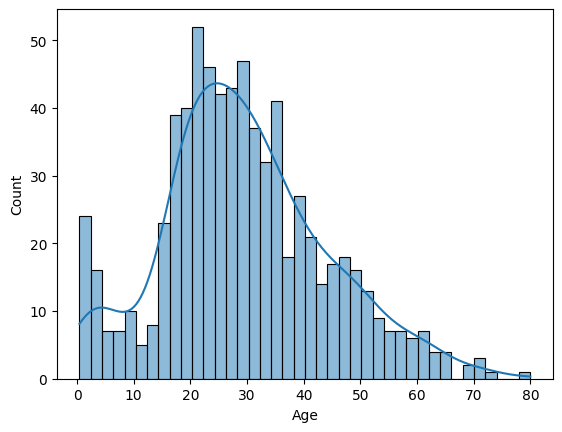

In [8]:
plt.figure()
sns.histplot(data=df, x="Age", bins=40, kde=True)

Данные о возрасте имеют, с небольшой поправкой на то, что на борту было немало детей, нориальное распределение, поэтому лучше всего заменить пропуски на среднее значение


In [9]:
mean_age = np.mean(df["Age"])
df["Age"] = df["Age"].fillna(mean_age)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Теперь осталось обработать пару пропусков в колонке Embarked. Т.к. пропуска всего 2 и информация о том, в каком порту пассажир сел на титаник несильно важной может оказаться в будущем, то можно просто заменить пропуски на моду


In [11]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].value_counts().index[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Когда пропуски обработаны, можно немного посмотреть как распределены данные

<Figure size 640x480 with 0 Axes>

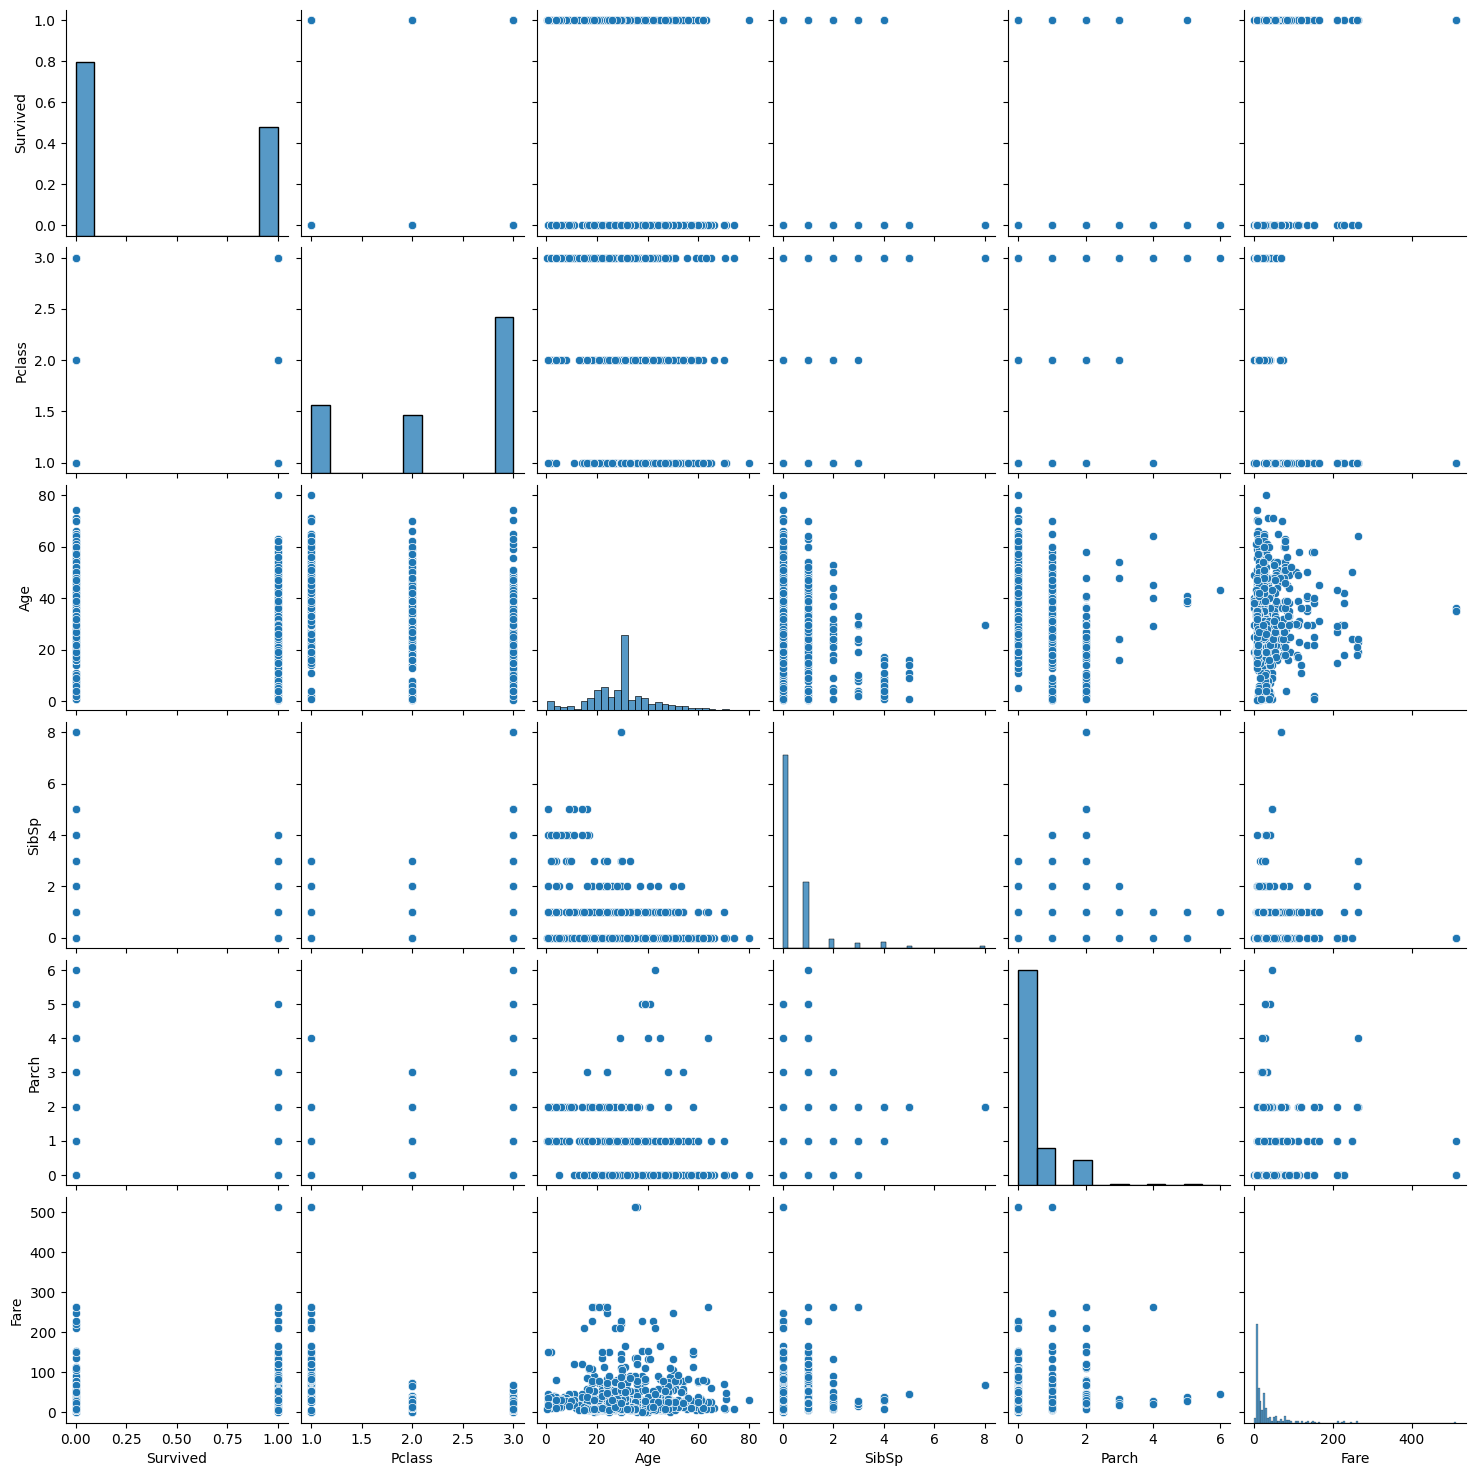

In [13]:
plt.figure()
sns.pairplot(data=df)

<Axes: xlabel='Survived', ylabel='count'>

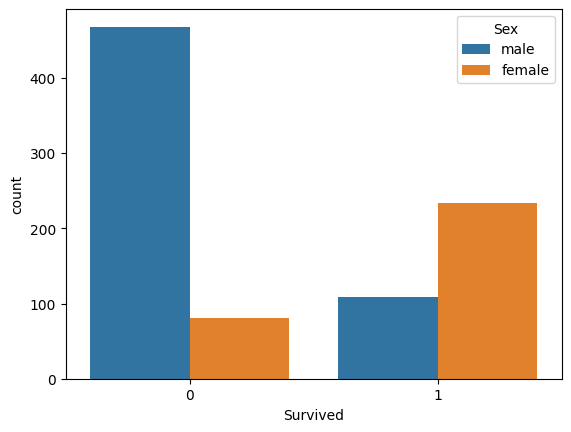

In [14]:
plt.figure()
sns.countplot(data=df, x="Survived", hue="Sex")

Закодируем категориальные данные one-hot кодированием


In [15]:
df = pd.get_dummies(df, drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


<Axes: >

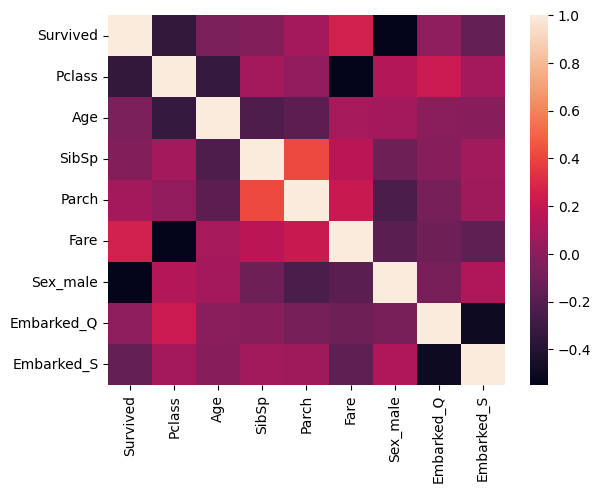

In [16]:
plt.figure()
sns.heatmap(data=df.corr())

<Axes: xlabel='None', ylabel='Survived'>

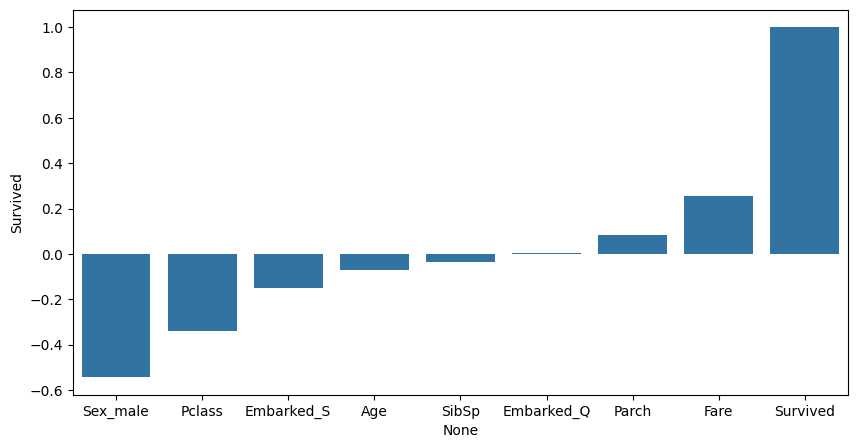

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.corr()["Survived"].sort_values().index, y=df.corr()["Survived"].sort_values())

Перед началом создания модели, произведем стандартизацию данных

In [18]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

Построим для начала линейную базовую модель


In [20]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

Произведем поиск оптимальных гиперпараметров на k-fold кросс-валидации с помощью GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV
params = {
    "penalty" : ["none", "l2"],
    "C" : [0.01, 0.1, 0.5, 1],

}
logistic_regression_gs = GridSearchCV(logistic_regression, params, n_jobs=-1, cv=5, scoring="accuracy")
logistic_regression_gs.fit(X_std, y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'penalty': ['none', 'l2']},
             scoring='accuracy')

In [22]:
logistic_regression_gs.cv_results_

{'mean_fit_time': array([0.01100316, 0.00521984, 0.00929413, 0.00761232, 0.01187234,
        0.00725155, 0.00816755, 0.00723658]),
 'std_fit_time': array([0.00547223, 0.00058219, 0.00230382, 0.00115478, 0.00682674,
        0.00086417, 0.00089927, 0.00054616]),
 'mean_score_time': array([0.00216131, 0.00181222, 0.00141702, 0.00150595, 0.00173941,
        0.00152483, 0.00173697, 0.00177031]),
 'std_score_time': array([9.46531433e-04, 9.62058029e-04, 4.35805685e-05, 1.30536173e-04,
        5.10955715e-04, 1.87218960e-04, 3.86903995e-04, 6.58832382e-04]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 0.5, 0.5, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['none', 'l2', 'none', 'l2', 'none', 'l2', 'none', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.

In [23]:
logistic_regression_gs.best_params_

{'C': 0.01, 'penalty': 'l2'}

Теперь загрузим тестовые данные и предобработаем их

In [24]:
df_test = pd.read_csv("test.csv")

In [25]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
df_test = df_test.drop(columns=["Name", "PassengerId", "Ticket", "Cabin"])
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [28]:
mean_age = np.mean(df_test["Age"])
df_test["Age"] = df_test["Age"].fillna(mean_age)

In [29]:
df_test["Embarked"] = df_test["Embarked"].fillna(df_test["Embarked"].value_counts().index[0])

In [30]:
mean_fare = np.mean(df_test["Fare"])
df_test["Fare"] = df_test["Fare"].fillna(mean_fare)

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [32]:
df_test = pd.get_dummies(df_test, drop_first=True)
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,1,1,0
1,3,47.00000,1,0,7.0000,0,0,1
2,2,62.00000,0,0,9.6875,1,1,0
3,3,27.00000,0,0,8.6625,1,0,1
4,3,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1,0,1
414,1,39.00000,0,0,108.9000,0,0,0
415,3,38.50000,0,0,7.2500,1,0,1
416,3,30.27259,0,0,8.0500,1,0,1


In [33]:
X_test = df_test

In [34]:
X_test_std = sc.transform(X_test)

In [35]:
y_pred_lr = logistic_regression_gs.predict(X_test_std)

In [36]:
submission = pd.read_csv('gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
submission["Survived"] = y_pred_lr
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [38]:
submission.to_csv('submission_lr.csv', index=None)

Данная модель получила 0.76555 accuracy score

Посмотрим какие результаты покажет какая-то нелинейная модель, например, RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier
params = {
    "criterion" : ["gini", "entropy"],
    "n_estimators" : [100, 150, 200, 250],
    "max_depth" : [4, 5, 6],
    "oob_score" : [True, False]

}
random_forest_gs = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1, cv=5, scoring="accuracy")
random_forest_gs.fit(X_std, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 130, 150],
                         'oob_score': [True, False]},
             scoring='accuracy')

In [48]:
random_forest_gs.cv_results_

{'mean_fit_time': array([0.34559994, 0.27712574, 0.44205546, 0.43716788, 0.86442475,
        0.45128212, 0.35954967, 0.2831326 , 0.45153909, 0.36564856,
        0.52532101, 0.42200966, 0.35279932, 0.28625422, 0.49872227,
        0.66759763, 0.62616768, 0.43562083, 0.34150634, 0.2723299 ,
        0.43875675, 0.35529547, 0.52212462, 0.41608772, 0.34968486,
        0.28317337, 0.68963733, 0.57490902, 0.5254004 , 0.4177959 ,
        0.3601676 , 0.28097706, 0.4609293 , 0.37785749, 0.52215066,
        0.41805778]),
 'std_fit_time': array([0.01720241, 0.01239775, 0.00936271, 0.09370922, 0.09223   ,
        0.07141909, 0.01557105, 0.01315232, 0.0066687 , 0.01411595,
        0.0124808 , 0.01482935, 0.00771719, 0.01226367, 0.08655104,
        0.06660636, 0.13146295, 0.03350106, 0.00923384, 0.00955181,
        0.01242981, 0.00326071, 0.00809275, 0.00979364, 0.00520434,
        0.00684037, 0.06178262, 0.07139781, 0.01421038, 0.00926561,
        0.01804841, 0.01512286, 0.00908183, 0.02152644, 0.012

In [49]:
random_forest_gs.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100, 'oob_score': True}

In [52]:
y_pred_rf = random_forest_gs.predict(X_test_std)
y_pred_rf

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
submission["Survived"] = y_pred_rf
submission.to_csv('submission_rf.csv', index=None)

Нелинейная модель показала результат чуть лучше - 0.7799 accuracy score